In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
from tqdm import tqdm
from feature_class import *

input_tsv = "/Users/hieunguyen/src/ecd_wgs_features/batch_test/1-ZLAAO90NB_S7509-S7709.sorted/1-ZLAAO90NB_S7509-S7709.sorted.final_output.tsv"
motif_order_path = "./motif_order.csv"
outputdir = "./batch_test/1-ZLAAO90NB_S7509-S7709.sorted"
path_to_old_nuc = "./batch_test/1-ZLAAO90NB_S7509-S7709.sorted/1-ZLAAO90NB_S7509-S7709.sorted.full_Nucleosome.dist.final.bed"

# files_to_delete = [item for item in pathlib.Path(outputdir).glob("*.bed") 
#                            if ".full_Nucleosome.dist.final.bed" in item.name == False 
#                            and ".final_output.tsv" in item.name == False]

output_obj = WGS_GW_Image_features(input_tsv = input_tsv,
                             motif_order_path = motif_order_path,
                             outputdir = outputdir,
                             path_to_old_nuc = path_to_old_nuc)
    
##### generate GW features and save features to output dir
output_obj.generate_flen_feature()
output_obj.generate_em_feature()
# output_obj.generate_nuc_feature()
output_obj.generate_nuc_feature_1()

all_features = WGS_GW_features(path_to_feature_dir="/Users/hieunguyen/src/ecd_wgs_features/batch_test",
                               path_to_metadata=None)

emdf = all_features.generate_em_matrix().reset_index()
nucdf = all_features.generate_nuc_matrix().reset_index()
flendf = all_features.generate_flen_matrix().reset_index()

old_emdf = pd.read_csv("em.old.csv", index_col=[0])
old_flendf = pd.read_csv("flen.old.csv", index_col=[0])
old_nucdf = pd.read_csv("nuc.old.csv", index_col=[0])   

sampleid = "ZLAAO90NB"

check_em = emdf.merge(old_emdf, right_on = "feat", left_on = "feat")
check_flen = flendf.merge(old_flendf, right_on = "feat", left_on = "feat")
check_nuc = nucdf.merge(old_nucdf, right_on = "feat", left_on = "feat")

reading in the input frag.tsv data
Generate features Nucleosome from old data, bedtools closest -t all, not -t first ...


/Users/hieunguyen/src/ecd_wgs_features/feature_class.py:195: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  output_nucdf = pd.read_csv(self.path_to_old_nuc, sep = "\t", header = None)
100%|██████████| 1/1 [00:00<00:00, 359.75it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'em.old.csv'

<Axes: xlabel='feat'>

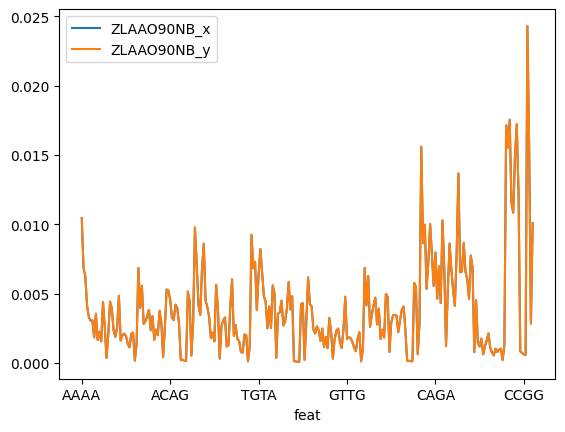

In [2]:
check_em.set_index("feat").plot()

<Axes: xlabel='feat'>

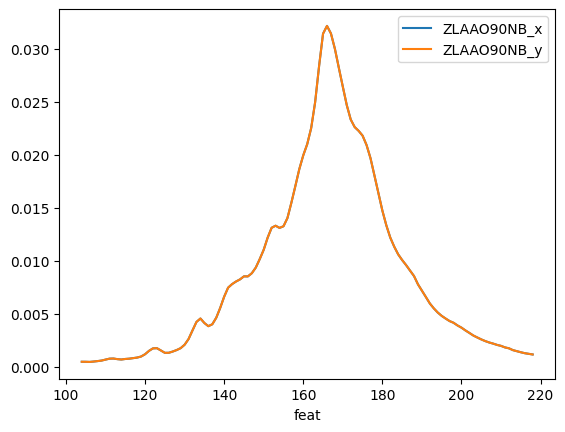

In [3]:
check_flen.set_index("feat").plot()

<Axes: xlabel='feat'>

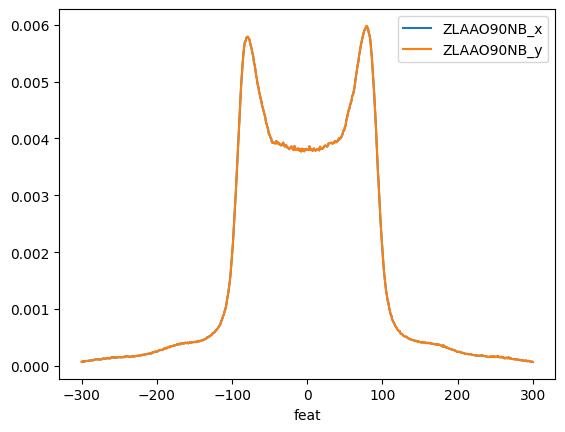

In [4]:
check_nuc.set_index("feat").plot()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
from tqdm import tqdm
from feature_class import *

input_tsv = "/Users/hieunguyen/src/ecd_wgs_features/batch_test/1-ZLAAO90NB_S7509-S7709.sorted/1-ZLAAO90NB_S7509-S7709.sorted.final_output.tsv"
motif_order_path = "./motif_order.csv"
outputdir = "./batch_test/1-ZLAAO90NB_S7509-S7709.sorted"
path_to_old_nuc = "./batch_test/1-ZLAAO90NB_S7509-S7709.sorted/1-ZLAAO90NB_S7509-S7709.sorted.full_Nucleosome.dist.final.bed"

keep_files = [item for item in pathlib.Path(outputdir).glob("*") if ".full_Nucleosome.dist.final.bed" in item.name 
                           or ".final_output.tsv" in item.name]
all_files = [item for item in pathlib.Path(outputdir).glob("*")]
files_to_delete = [item for item in all_files if item not in keep_files]


2
28
26
